In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

gdf = gpd.read_file("business_case_202505.shp")
print(gdf.head())

   farm_seaso  farm_sea_1 farm_sea_2   area           crop_name  \
0      1208.0     16515.0    Champ 0   0.29   Permanent pasture   
1      1208.0     16516.0         SB   5.39          Grain corn   
2      1208.0     16517.0    Champ 2   0.08   Permanent pasture   
3      1208.0     16518.0       POMP  12.13  Durum winter wheat   
4      1208.0     16519.0       PIV1  10.04          Grain corn   

                                            geometry  
0  POLYGON ((1.55277 43.30601, 1.55278 43.306, 1....  
1  POLYGON ((1.55278 43.306, 1.55277 43.30601, 1....  
2  POLYGON ((1.55277 43.30601, 1.55271 43.30598, ...  
3  POLYGON ((1.56368 43.29696, 1.56399 43.29678, ...  
4  POLYGON ((1.56145 43.30061, 1.56146 43.30061, ...  


In [34]:
gdf.columns
gdf = gdf[['farm_seaso','farm_sea_1','geometry','area']]

In [35]:
# geometry column (should be polygons)
print(gdf.geometry.head())
print(gdf.geom_type.unique())

0    POLYGON ((1.55277 43.30601, 1.55278 43.306, 1....
1    POLYGON ((1.55278 43.306, 1.55277 43.30601, 1....
2    POLYGON ((1.55277 43.30601, 1.55271 43.30598, ...
3    POLYGON ((1.56368 43.29696, 1.56399 43.29678, ...
4    POLYGON ((1.56145 43.30061, 1.56146 43.30061, ...
Name: geometry, dtype: geometry
['Polygon']


In [41]:
## double check if it's in ha

# Confirm or set CRS (WGS84 if it's lat/lon)
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)

# Reproject to metric CRS (e.g. EPSG:2154 = Lambert-93 for France)
gdf = gdf.to_crs(epsg=2154)

#Calculate area in m²
gdf["area_m2"] = gdf.geometry.area

# Convert to hectares
gdf["area_ha"] = gdf["area_m2"] / 10_000

# View result
print(gdf[["farm_sea_1", "area_m2", "area_ha",'area']])


     farm_sea_1        area_m2    area_ha    area
0       16515.0    2905.831402   0.290583   0.290
1       16516.0   53922.700040   5.392270   5.390
2       16517.0     800.840718   0.080084   0.080
3       16518.0  121276.665254  12.127667  12.130
4       16519.0  100413.043177  10.041304  10.040
..          ...            ...        ...     ...
163    360943.0   38634.954051   3.863495   3.940
164    360944.0   21263.920741   2.126392   1.970
165    360945.0   97416.887789   9.741689   9.100
166    360946.0    6197.998204   0.619800   1.310
167    360947.0    1471.568401   0.147157   0.147

[168 rows x 4 columns]


In [37]:
# comapre to other datasets
gdf['farm_sea_1'].nunique() #

168

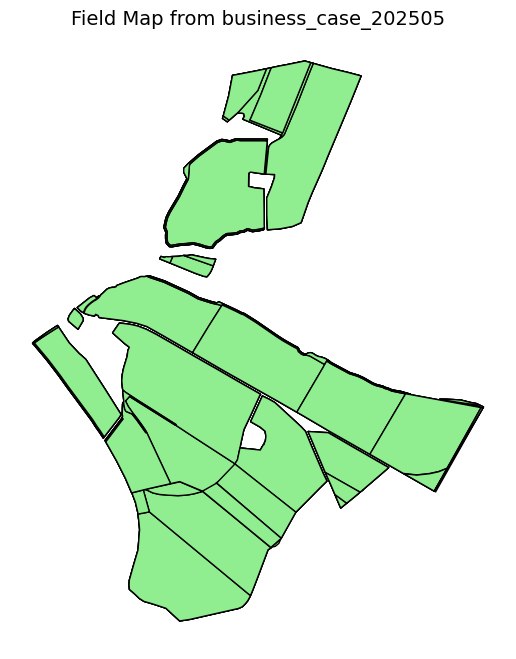

In [38]:
import matplotlib.pyplot as plt

# Plot the fields
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, edgecolor='black', facecolor='lightgreen')

ax.set_title("Field Map from business_case_202505", fontsize=14)
ax.set_axis_off()
plt.show()

<ipython-input-40-703e860bb8de>:22: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


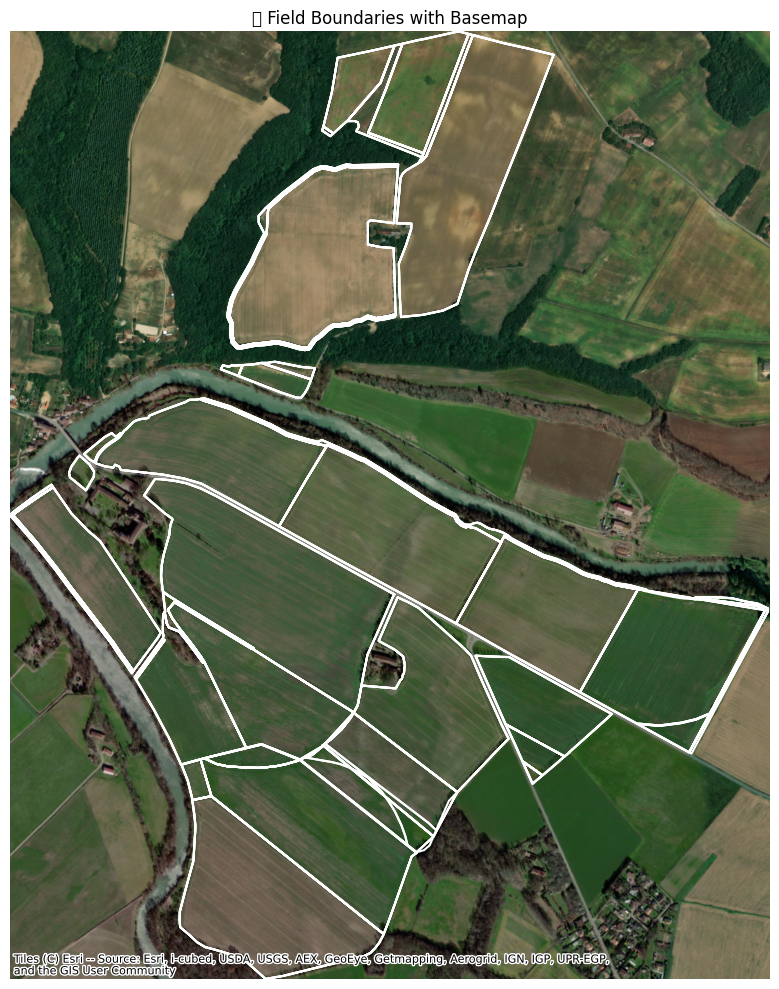

In [40]:
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)

#Convert to Web Mercator for basemap overlay
gdf = gdf.to_crs(epsg=3857)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='white', facecolor='none', linewidth=1.5)

# Focus zoom on your field bounds
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Step 4: Add basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery,zoom=18)


ax.set_title("🗺️ Field Boundaries with Basemap")
ax.axis("off")
plt.tight_layout()
plt.show()
